In [1]:
import my_plotting
import markers
import importlib
import utils
import covax_constants
import GeneModules

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

import warnings
warnings.simplefilter("ignore")


import scanpy as sc

In [2]:
ct = 'Monocyte CD16'
adata = sc.read_h5ad(f'{ct}.h5ad')

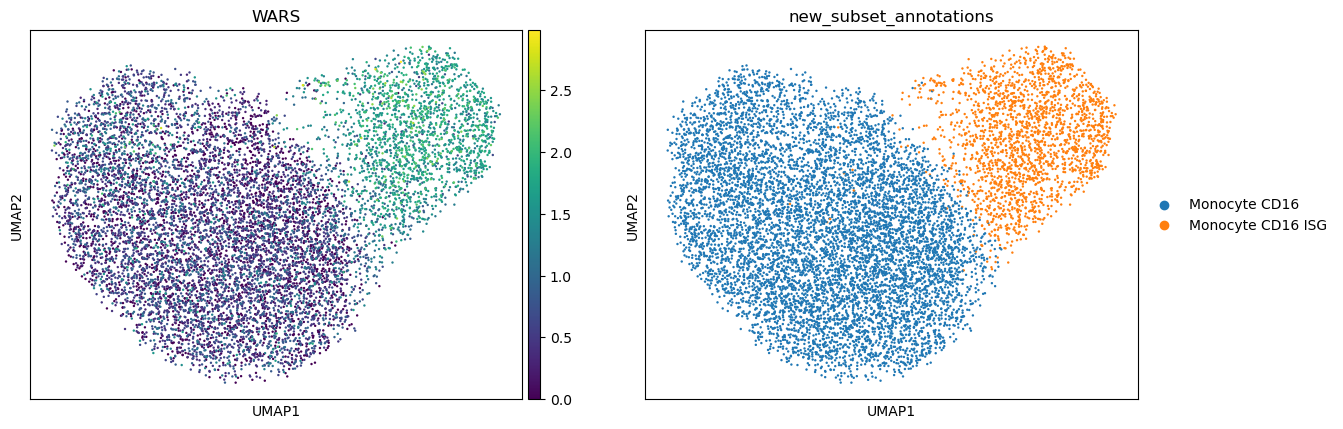

In [3]:
sc.pl.umap(adata, color = ['WARS', 'new_subset_annotations'])

# ISG subsets

In [4]:
adata_isg = adata[adata.obs.new_subset_annotations == 'Monocyte CD16 ISG'].copy()

adata_isg = adata_isg.raw.to_adata()

adata_isg.raw = adata_isg.copy()

adata_isg = adata_isg[:, adata_isg.var.is_rna]

In [5]:
sc.pp.highly_variable_genes(adata_isg, batch_key='library')

adata_isg = adata_isg[:, adata_isg.var.highly_variable]

In [6]:
sc.pp.scale(adata_isg, max_value=10)

In [7]:
sc.tl.pca(adata_isg, svd_solver='arpack')

In [8]:
sc.external.pp.bbknn(adata_isg, batch_key='library', n_pcs=20)

In [9]:
sc.tl.umap(adata_isg)

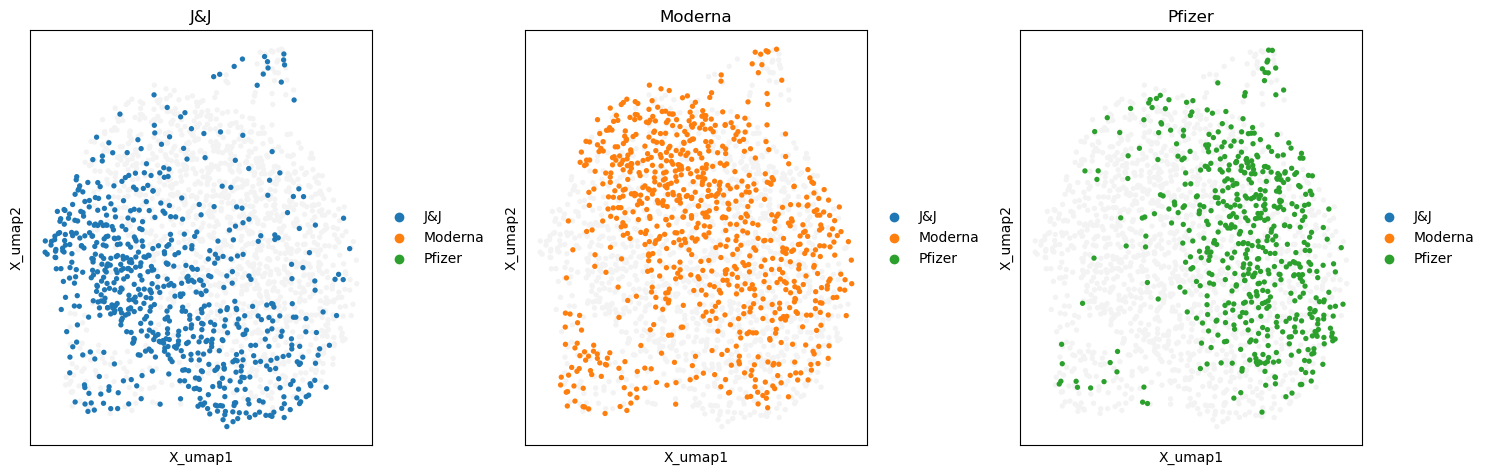

In [10]:
my_plotting.split_umap(adata_isg, split_by='Vaccine', ncols=3, cmap = 'Reds');

In [11]:
sc.tl.leiden(adata_isg, resolution = 0.7, key_added='leiden_070')

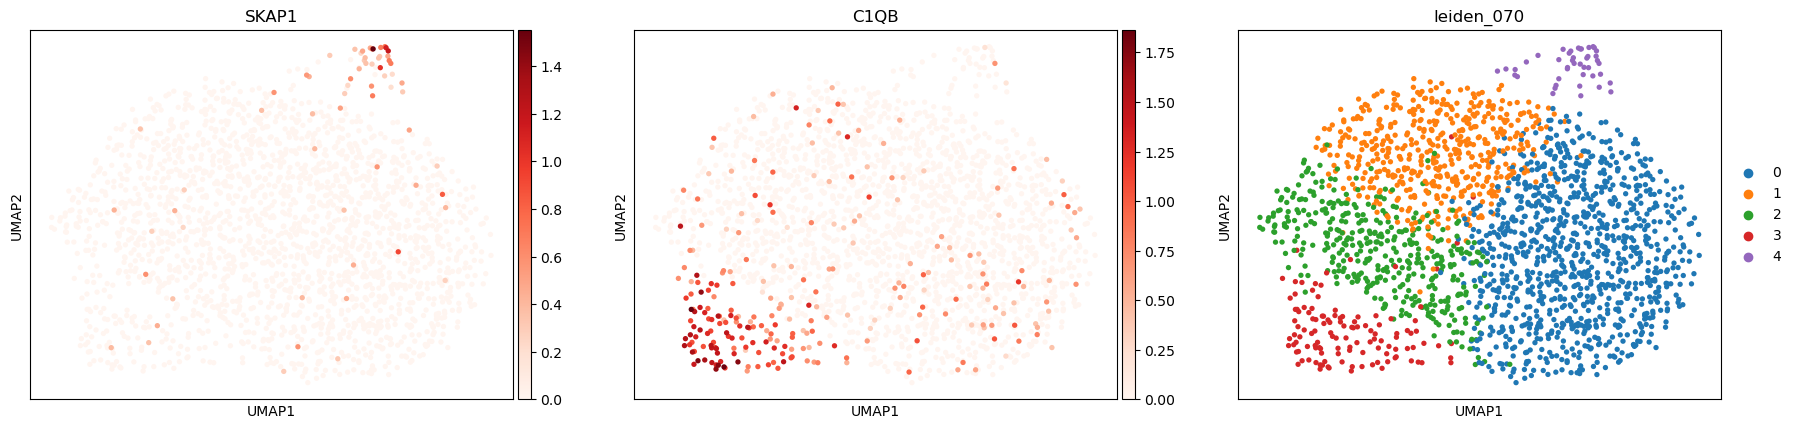

In [12]:
sc.pl.umap(adata_isg, color = ['SKAP1', 'C1QB', 'leiden_070'], ncols = 3, cmap = 'Reds')

In [13]:
adata_isg.obs['new_subset_annotations_2'] = adata_isg.obs.leiden_070.map({
    '0':'Monocyte CD16 ISG',
    '1':'Monocyte CD16 ISG',
    '2':'Monocyte CD16 ISG',
    '3':'Monocyte CD16 ISG Complement',
    '4':'Doublet',
})

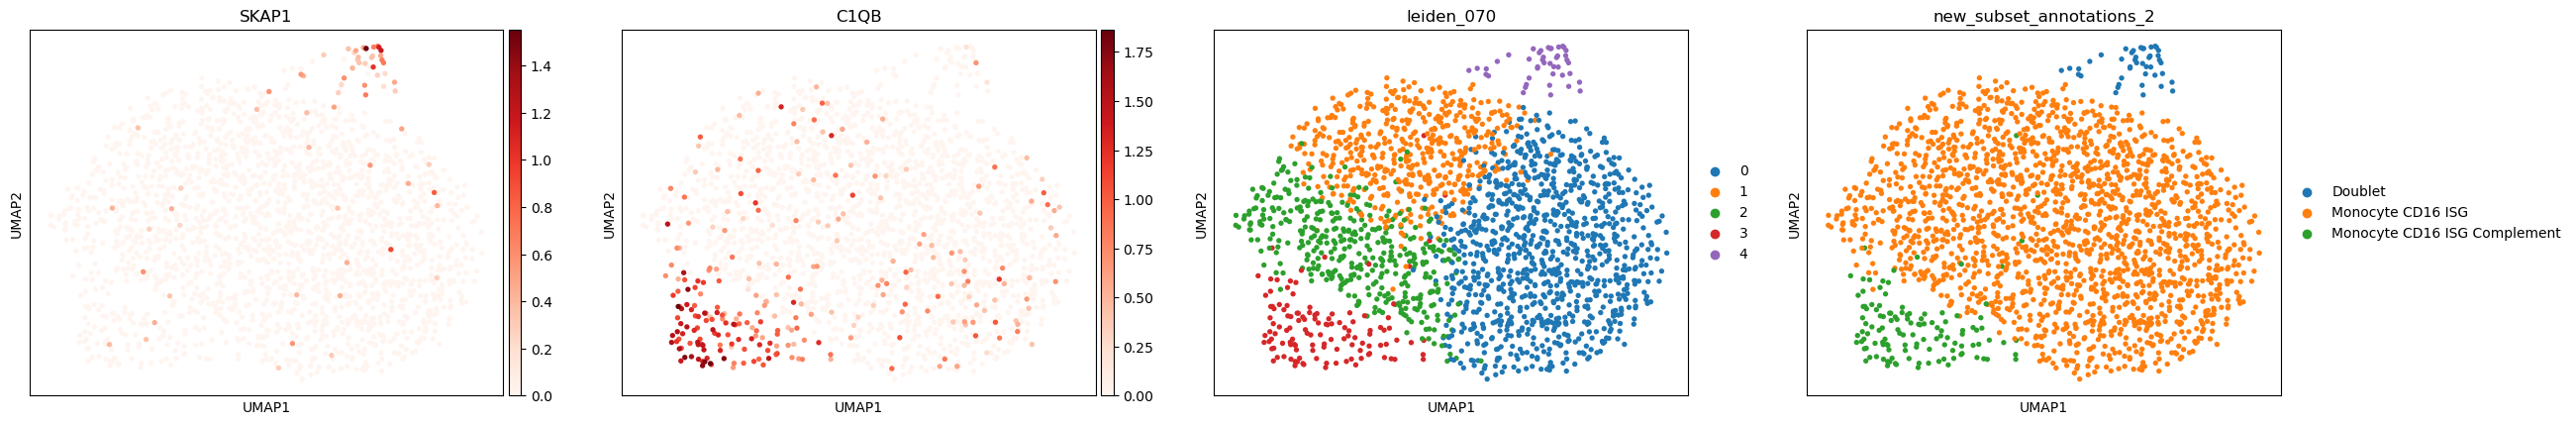

In [14]:
sc.pl.umap(adata_isg, color = ['SKAP1', 'C1QB', 'leiden_070', 'new_subset_annotations_2'], ncols = 4, cmap = 'Reds')

# Non-ISG subsets

In [15]:
adata_nonisg = adata[adata.obs.new_subset_annotations == 'Monocyte CD16'].copy()

adata_nonisg = adata_nonisg.raw.to_adata()

adata_nonisg.raw = adata_nonisg.copy()

adata_nonisg = adata_nonisg[:, adata_nonisg.var.is_rna]

sc.pp.highly_variable_genes(adata_nonisg, batch_key='library')

adata_nonisg = adata_nonisg[:, adata_nonisg.var.highly_variable]

sc.pp.scale(adata_nonisg, max_value=10)

sc.tl.pca(adata_nonisg, svd_solver='arpack')

In [16]:
sc.external.pp.bbknn(adata_nonisg, batch_key='library', n_pcs=10)

sc.tl.umap(adata_nonisg)

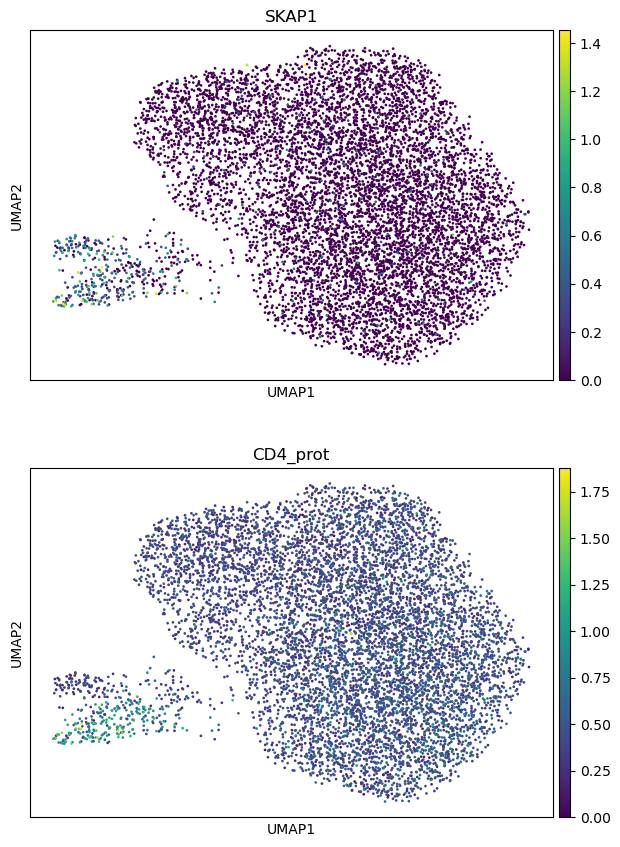

In [17]:
sc.pl.umap(adata_nonisg, color = ['SKAP1', 'CD4_prot'], ncols=1)

In [18]:
sc.tl.leiden(adata_nonisg, resolution = 0.3, key_added='leiden_030')

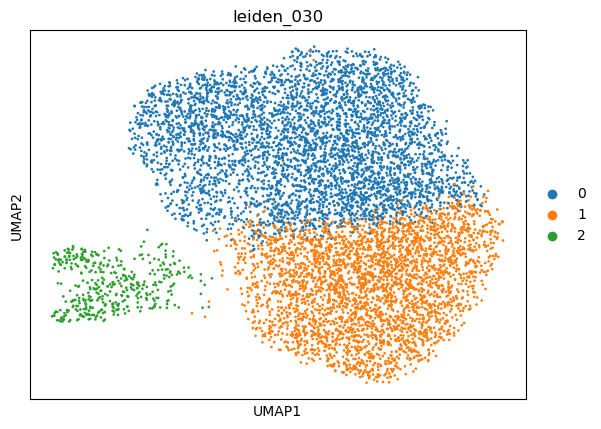

In [19]:
sc.pl.umap(adata_nonisg, color = ['leiden_030'])

In [20]:
adata_nonisg.obs['new_subset_annotations_2'] = adata_nonisg.obs['leiden_030'].map({
    '0': 'Monocyte CD16',
    '1': 'Monocyte CD16',
    '2': 'Doublet',
})

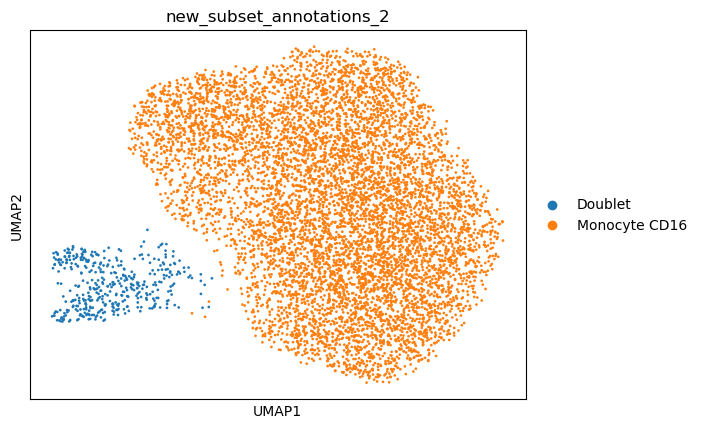

In [21]:
sc.pl.umap(adata_nonisg, color = ['new_subset_annotations_2'])

In [22]:
adata.obs['new_subset_annotations_2'] = 'Unknown'
adata.obs.loc[adata_isg.obs_names, 'new_subset_annotations_2'] = adata_isg.obs.new_subset_annotations_2
adata.obs.loc[adata_nonisg.obs_names, 'new_subset_annotations_2'] = adata_nonisg.obs.new_subset_annotations_2

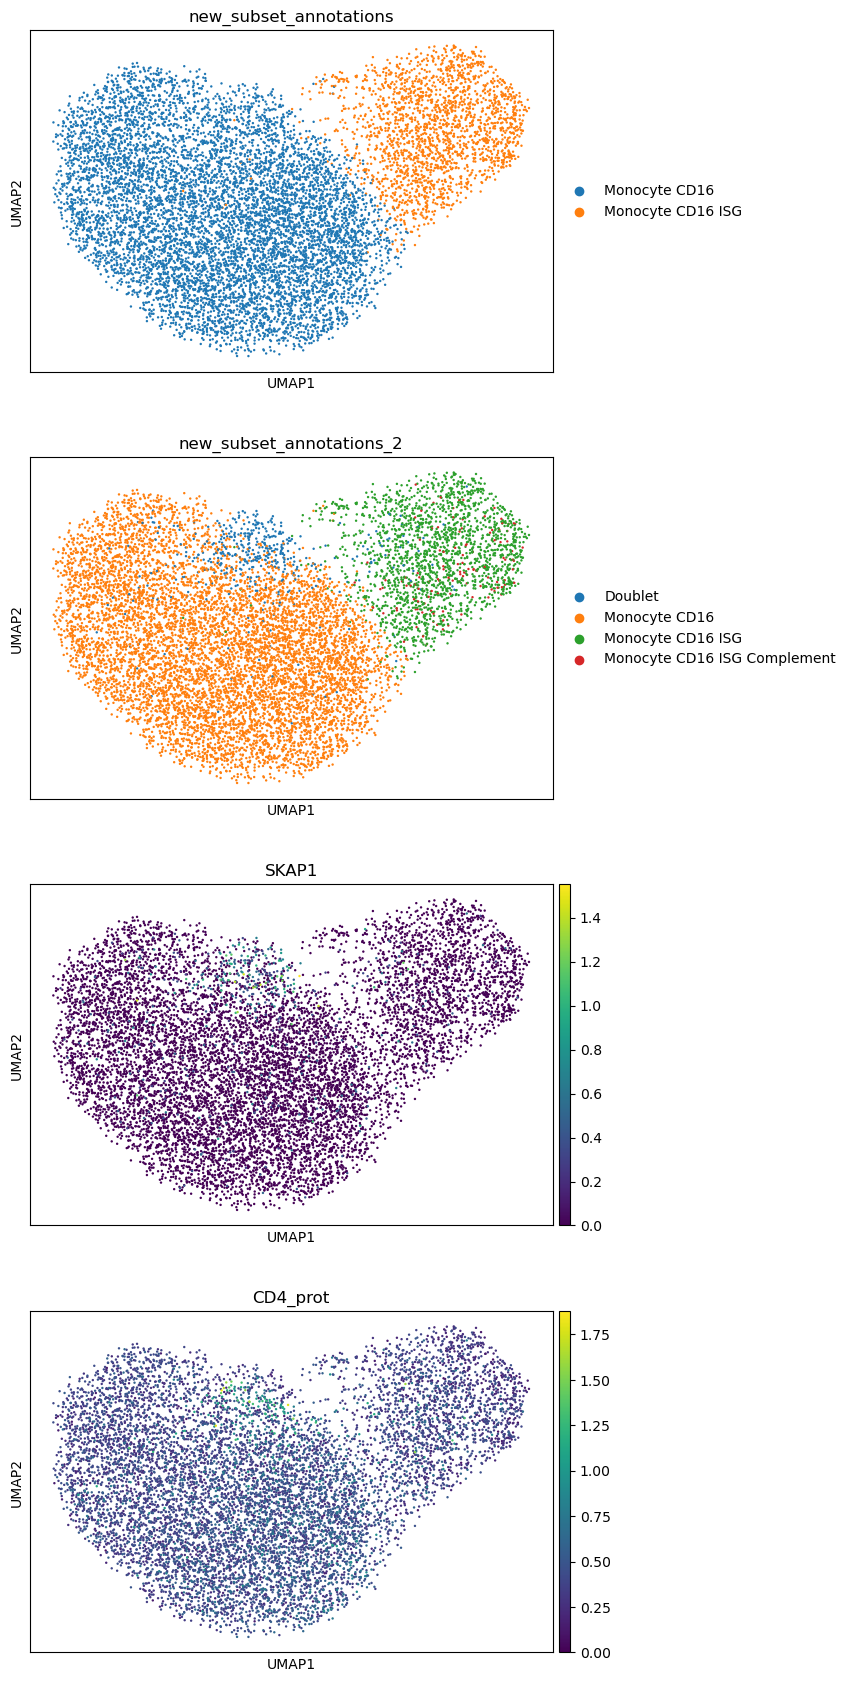

In [23]:
sc.pl.umap(adata, color = ['new_subset_annotations', 'new_subset_annotations_2', 'SKAP1', 'CD4_prot'], ncols=1)

In [24]:
adata.write_h5ad('Monocyte CD16-1.h5ad')